## [174. Dungeon Game](https://leetcode.com/problems/dungeon-game/)

问题难度: &clubs; &clubs; &clubs; &clubs; &clubs;

### 问题描述

恶魔抓了公主(**P**)然后将她囚禁在地牢的右下角. 地牢由`M X N`个放置在`2`维格子中的房间组成. 我们勇敢的骑士(**K**)起始位于地牢的左上角, 必须穿过地牢才能救出公主.

骑士有一个使用正数表示的初始健康值. 一旦健康值掉到`0`或者以下, 那么他立刻会死去.

一些房间是被恶魔守护的,一旦骑士进入这些房间就会丢失健康值(负数), 其它的房间要么是`0`, 要么是包含魔法的魔法球来提高骑士的健康(正数).

为了尽可能快地到达公主处, 骑士决定每一步只会向下或者向右移动.

**写一个函数来确定能保证骑士拯救到公主的最小初始生命值.**

例如, 给定下面的地牢, 沿着最优路径`右->右->下->下`的前提下, 在骑士的最小生命值必须至少为**7**:

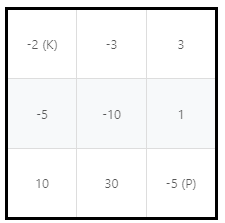

**注意**:
- 骑士的健康没有上限
- 任意房间都有可能包含威胁或者能量增加, 即使是骑士进入的第一个房间和公主被囚禁的最后一个房间

### 解题思路

一般这类问题都可以使用动态规划法进行求解:

首先, 使用数学的方式定义好问题: 使用`dp[i][j]`来存储当前位置`(i,j)`起始出发的血量; 接下来考虑递推公式, 需要考虑决定影响每个位置的因素, 骑士会挂主要是因为去了下一个房间时, 当前的血量小于要去的下一个位置的血量, 而能去的房间只能是右边和下边, 所以当前位置的血量可能由右边房间和下边房间决定, 进一步说: 由较小的血量决定的.因为我们需要求的是较小的起始位置血量. 由于我们是逆向推导的, 因此骑士进入下一个房间进行`PK`之前的血量是等于进入当前房间进行`PK`之后的血量. 当用当前房间右边或者下边房间的起始值中的较小值减去当前房间的值, 如果小于等于`0`, 那么说明当前房间的值是正数, 最小生命值取`1`就可以了; 如果大于`0`, 则说明都有可能, 但是骑士进入当前房间后的生命值就一定要是这个差值. 因此得到递推方程: `dp[i][j] = max(1, min(d[i+1][j], d[i][j+1])-d[i][j])`.

### 代码

In [1]:
class Solution(object):
    def calculateMinimumHP(self, dungeon):
        """
        :type dungeon: List[List[int]]
        :rtype: int
        """
        if len(dungeon) == 0:
            return 0
        m, n = len(dungeon), len(dungeon[0])
        INT_MAX = 2147483647
        dp = [[INT_MAX for _ in range(n+1)] for _ in range(m+1)]
        dp[m][n-1], dp[m-1][n] = 1, 1
        for i in range(m-1, -1, -1):
            for j in range(n-1, -1, -1):
                tmp = ((dp[i+1][j] - dungeon[i][j]) if dp[i+1][j] <  dp[i][j+1] else (dp[i][j+1] - dungeon[i][j]))
                dp[i][j] = 1 if 1 > tmp else tmp
        return dp[0][0]

In [3]:
s = Solution()
dungeon = [[-2,-3,3],[-5,-10,1],[10,30,-5]]
print(s.calculateMinimumHP(dungeon))
dungeon = [[0,0]]
print(s.calculateMinimumHP(dungeon))

7
1


## [175. Combine Two Tables](https://leetcode.com/problems/combine-two-tables/)

问题难度: &clubs;

### 问题描述

表: `Person`

```
+-------------+---------+
| Column Name | Type    |
+-------------+---------+
| PersonId    | int     |
| FirstName   | varchar |
| LastName    | varchar |
+-------------+---------+
PersonId 是本表的主键.
```

表: `Address`
```
+-------------+---------+
| Column Name | Type    |
+-------------+---------+
| AddressId   | int     |
| PersonId    | int     |
| City        | varchar |
| State       | varchar |
+-------------+---------+
AddressId 是本表的主键.
```

写一个`SQL`查询预计提供`Person`表中每个人的以下信息,(无论这些用户是否都有地址):
```
FirstName, LastName, City, State
```

### 解题思路

这是一个典型的`left join`的应用.

### 代码

```
# Write your MySQL query statement below
select p.FirstName, p.LastName, a.City, a.State from Person p left join Address a on p.PersonId = a.PersonId;
```

## [176. Second Highest Salary](https://leetcode.com/problems/second-highest-salary/)

问题难度: &clubs;

### 问题描述

写一个`SQL`查询获得`Employee`表中第二高的工资.
```
+----+--------+
| Id | Salary |
+----+--------+
| 1  | 100    |
| 2  | 200    |
| 3  | 300    |
+----+--------+
```

例如, 给定上面`Employee`表的情况下, 查询应该返回`200`作为第二高的工资. 如果没有第二高的工资, 那么查询应该返回`null`.

```
+---------------------+
| SecondHighestSalary |
+---------------------+
| 200                 |
+---------------------+
```

### 解题思路

结合使用`sort`/`limit`以及`offset`: `limit n offeset m`取第`m`到`n`的数据
`IFNULL`: 是否为空.

### 代码
```
# Write your MySQL query statement below
select IFNULL((select distinct(Salary) from Employee order by Salary desc limit 1 offset 1), NULL) as SecondHighestSalary;
```

## [177. Nth Highest Salary](https://leetcode.com/problems/nth-highest-salary/)

问题难度: &clubs; &clubs; &clubs;

### 问题描述

写一个`SQL`查询来获得`Employee`表中第`n`高的薪水.

```
+----+--------+
| Id | Salary |
+----+--------+
| 1  | 100    |
| 2  | 200    |
| 3  | 300    |
+----+--------+
```

例如, 给定上面的`Employee`表, 当`n=2`时的第`2`高的薪水为`200`. 如果没有第`n`高的薪水, 查询应该返回`null`.

```
+------------------------+
| getNthHighestSalary(2) |
+------------------------+
| 200                    |
+------------------------+
```

### 解题思路

类似于之前的题目, 把`offset`的参数修改下即可.

### 代码
```
CREATE FUNCTION getNthHighestSalary(N INT) RETURNS INT
BEGIN
  DECLARE M int;
  SET M = N - 1;
  RETURN (
      # Write your MySQL query statement below.
      select IFNULL((select distinct(Salary) from Employee order by Salary desc limit 1 offset M), NULL)
  );
END
```

## [178. Rank Scores](https://leetcode.com/problems/rank-scores/)

问题难度: &clubs; &clubs; &clubs;

### 问题描述

写一个`SQL`语句来对分数进行排序, 如果两个分数之间相等, 两个分数应该有相同的序号. 而相等之后的数的序号应该是连续的整数值, 也就是说, 在序列之间没有任何遗漏.

```
+----+-------+
| Id | Score |
+----+-------+
| 1  | 3.50  |
| 2  | 3.65  |
| 3  | 4.00  |
| 4  | 3.85  |
| 5  | 4.00  |
| 6  | 3.65  |
+----+-------+
```

例如, 给定上面的`Score`表, 我们的查询语句应该生成下面的结果(分数从高到低排列):
```
+-------+------+
| Score | Rank |
+-------+------+
| 4.00  | 1    |
| 4.00  | 1    |
| 3.85  | 2    |
| 3.65  | 3    |
| 3.65  | 3    |
| 3.50  | 4    |
+-------+------+
```

### 解题思路

第一种方法: 针对每一个分数, 判断大于该分数的数目作为`Rank`即可.

第二种方法: 使用内交, `Scores`表自己内交, 将那些左边表分数大于右边表的`join`起来, 然后计算数目

第三种方法: 使用两个变量来标识, 其中`Rank`表示当前排序, `pre`标识之前的分数

###  代码

```
# Write your MySQL query statement below
SELECT Score, 
(SELECT count(DISTINCT Score) FROM Scores WHERE Scores.Score >= s.Score) 
AS Rank FROM Scores s ORDER BY s.Score DESC;

SELECT s.Score, 
COUNT(DISTINCT t.Score) AS Rank FROM Scores s JOIN Scores t on s.Score <= t.Score GROUP BY s.Id ORDER BY s.Score DESC;

SELECT Score, 
@rank := @rank + (@pre <> @pre := Score) AS Rank FROM Scores, (SELECT @rank := 0, @pre := -1) INIT ORDER BY Score DESC;

```

## [179. Largest Number](https://leetcode.com/problems/largest-number/)

问题难度: &clubs; &clubs; &clubs;

### 问题描述

给定一个非负整数的列表, 对它们重新整理使得形成最大的数字.

**示例1**
```
Input: [10,2]
Output: "210"
```

**示例2**
```
Input: [3,30,34,5,9]
Output: "9534330"
```

**注意:** 结果可能会非常大, 因此我们需要返回字符串而不是整数.

### 解题思路

组合数字: 对列表中的数字进行排序, 排序规则如下:从前向后遍历, 比较出当前数字的大小(其实本质上就是转化为字符串之后再排序).最后将数字叠加起来排序就好.

后来测试了一下, 发现不能直接对字符串进行排序, 例如`9`和`90`, 应该优先将`9`排在前面, 所以需要自己写一个比较函数, 对于输入的字符串`a`和`b`:
如果`a==b`, 那么直接返回`0`.
否则, 初始化: `i=0, i< min(len(a), len(b))`


- 如果`a_i == b_i`, 那么 `i += 1`
- 否则, 返回`a[i] - b[i]`

最后返回`a+b, b+a`的比较.

### 代码

In [10]:
from functools import cmp_to_key

class Solution(object):
    def largestNumber(self, nums):
        """
        :type nums: List[int]
        :rtype: str
        """
        def cmpStr(s1, s2):
            if s1 == s2:
                return 1
            i = 0
            while i < len(s1) and i < len(s2):
                a_i = s1[i]
                b_i = s2[i]
                if a_i != b_i:
                    return int(a_i) - int(b_i)
                i += 1
            return cmpStr(s1+s2, s2+s1)
        str_nums = []
        for num in nums:
            str_nums.append(str(num))
        str_nums = sorted(str_nums, key=cmp_to_key(cmpStr), reverse=True)
        if len(str_nums) > 0 and str_nums[0] != "0":
            return "".join(str_nums)
        else:
            return "0"

In [12]:
s = Solution()
nums = [9051,5526,2264,5041,1630,5906,6787,8382,4662,4532,6804,4710,4542,2116,7219,8701,8308,957,8775,4822,396,8995,8597,2304,8902,830,8591,5828,9642,7100,3976,5565,5490,1613,5731,8052,8985,2623,6325,3723,5224,8274,4787,6310,3393,78,3288,7584,7440,5752,351,4555,7265,9959,3866,9854,2709,5817,7272,43,1014,7527,3946,4289,1272,5213,710,1603,2436,8823,5228,2581,771,3700,2109,5638,3402,3910,871,5441,6861,9556,1089,4088,2788,9632,6822,6145,5137,236,683,2869,9525,8161,8374,2439,6028,7813,6406,7519]
print(s.largestNumber(nums))
nums = [121,12]
print(s.largestNumber(nums))
nums = [0, 0]
print(s.largestNumber(nums))

995998549642963295795569525905189958985890288238775871870185978591838283748308830827481618052787813771758475277519744072727265721971071006861683682268046787640663256310614560285906582858175752573156385565552654905441522852245213513750414822478747104662455545424532434289408839763963946391038663723370035134023393328828692788270926232581243924362362304226421162109163016131603127210891014
12121
0


## [180. Consecutive Numbers](https://leetcode.com/problems/consecutive-numbers/)

问题难度: &clubs; &clubs; &clubs;

### 问题描述

写一个`SQL`语句找到至少连续出现`3`次的所有数字.

```
+----+-----+
| Id | Num |
+----+-----+
| 1  |  1  |
| 2  |  1  |
| 3  |  1  |
| 4  |  2  |
| 5  |  1  |
| 6  |  2  |
| 7  |  2  |
+----+-----+
```

例如, 给定上面的`Logs`表格, `1`是唯一一个至少连续出现`3`次的数字.

```
+-----------------+
| ConsecutiveNums |
+-----------------+
| 1               |
+-----------------+
```

### 解题思路

这道题目其实比较考察 `SQL`语句中参数的定义和使用.

思路很简单: 初始化两个值, 一个是之前的数`pre_num`, 一个是之前的计数`count`, 当`pre_num == Num`时, 增加`count`; 当`pre_num != Num`时, 输出`pre_num`和`count`, 最后输出所有`count >=3 `的`num`即可.

### 代码

```
# Write your MySQL query statement below
SELECT DISTINCT t.Num as ConsecutiveNums FROM (SELECT Num,
CASE 
WHEN Num = @preNum THEN @count := @count + 1
ELSE @count := 1
END
AS count, 
@preNum := Num as preNum
FROM Logs, (SELECT @count := 0, @preNum := NULL) INIT) t WHERE t.count >= 3;
```